In [ ]:
# Mobile Price Range Prediction Project
# This project aims to build a machine learning system that predicts whether a mobile phone's price is low, medium, high, or very high based on its features.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
Step 2: Load Dataset
df = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Mobile price Prediction.csv")

In [4]:
# Split features and labels
X = df.drop("price_range", axis=1)
y = df["price_range"]

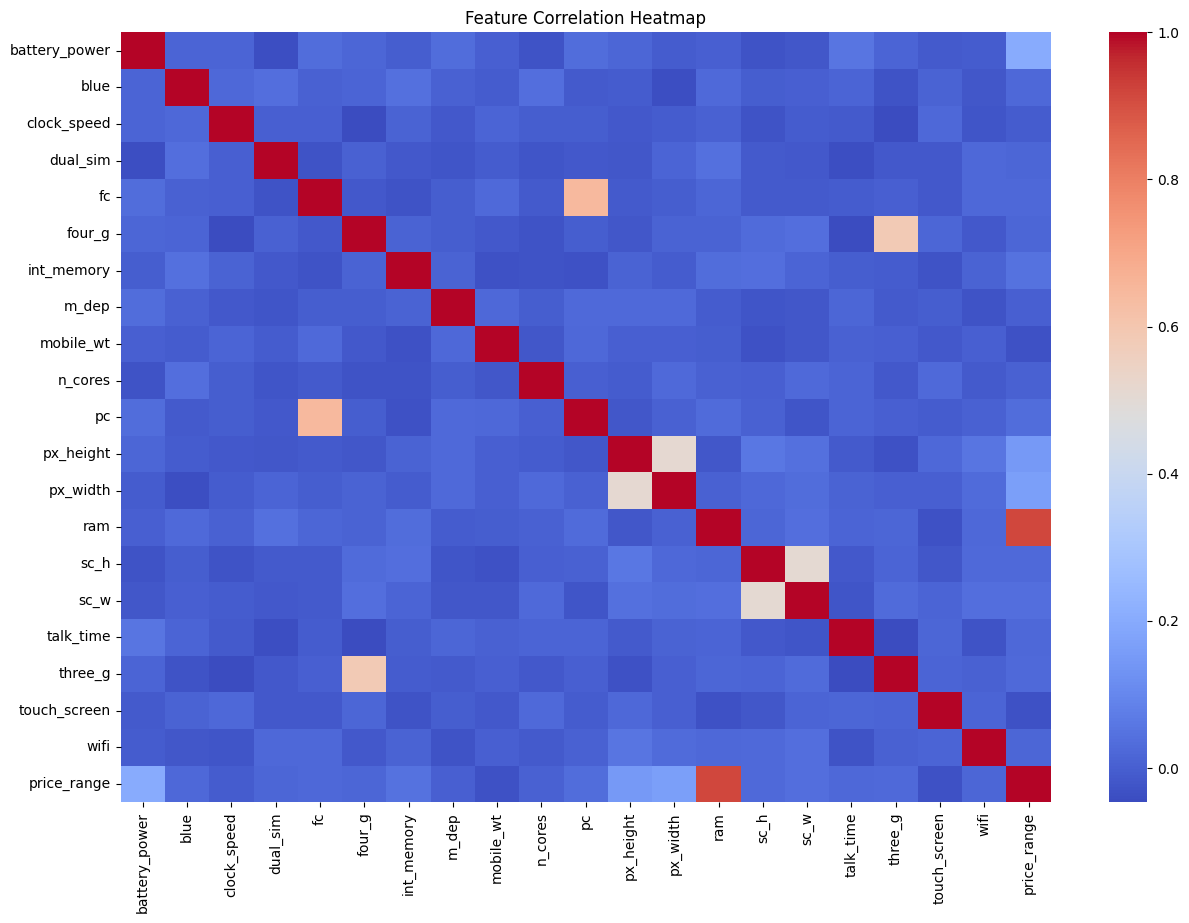

In [14]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8924\3168813098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')


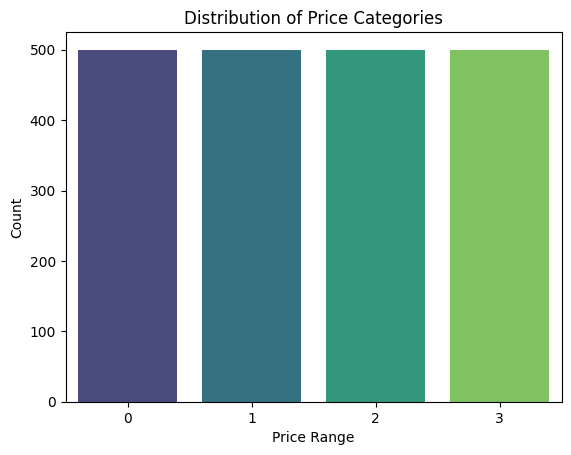

In [15]:
# Count plot of target variable
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title("Distribution of Price Categories")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

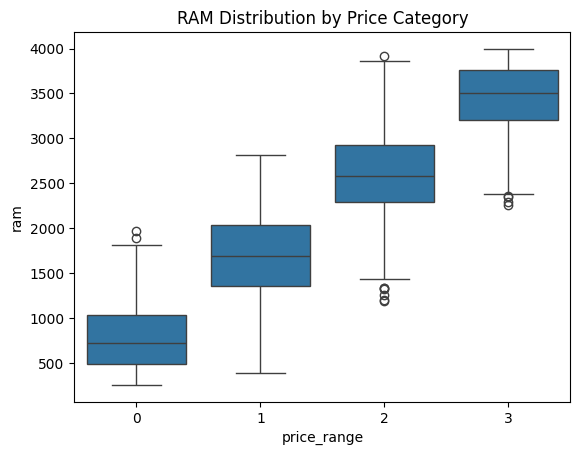

In [16]:
# Boxplot of RAM by price range
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM Distribution by Price Category")
plt.show()

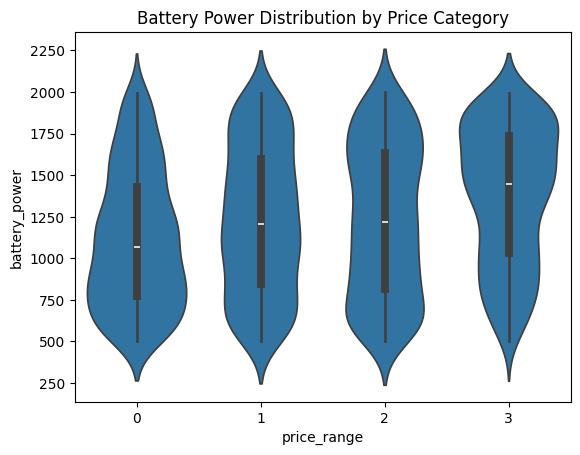

In [17]:
# Violin plot of battery_power
sns.violinplot(x='price_range', y='battery_power', data=df)
plt.title("Battery Power Distribution by Price Category")
plt.show()

In [5]:
# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Train Multiple Models
# Initial model evaluation
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

initial_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    initial_results[name] = acc

In [8]:
# Hyperparameter tuning 
# Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
gb_grid.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb_grid.best_estimator_.predict(X_test))


In [9]:
# Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
rf_grid.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_grid.best_estimator_.predict(X_test))


In [10]:
# SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=3)
svm_grid.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_grid.best_estimator_.predict(X_test))

In [11]:
# Step 6: Visualize Tuned Model Accuracies
# Compare tuned model results
tuned_results = {
    'Gradient Boosting': gb_acc,
    'Random Forest': rf_acc,
    'SVM': svm_acc
}

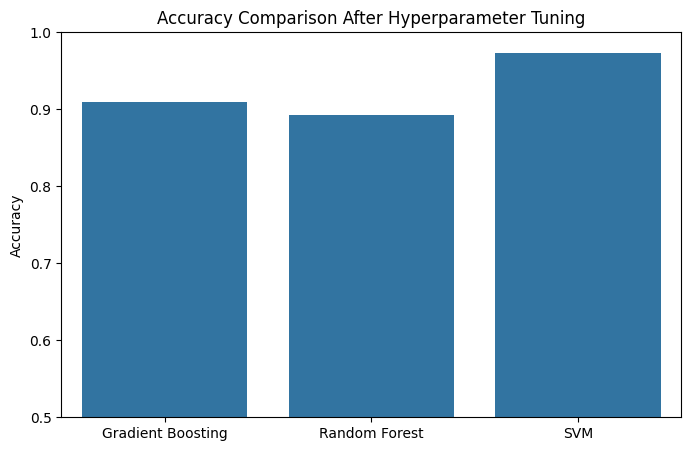

In [12]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(tuned_results.keys()), y=list(tuned_results.values()))
plt.title("Accuracy Comparison After Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.show()

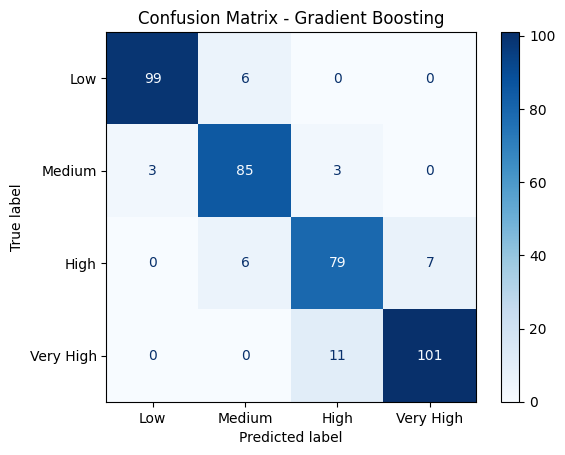

In [18]:
# Confusion Matrix for Best Model
from sklearn.metrics import ConfusionMatrixDisplay

best_model = gb_grid.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Low", "Medium", "High", "Very High"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

In [19]:
# Print final model performances
print("Initial Results:", initial_results)
print("\nTuned Results:", tuned_results)
print("\nBest Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best SVM Parameters:", svm_grid.best_params_)


Initial Results: {'Random Forest': 0.8925, 'K-Nearest Neighbors': 0.53, 'Support Vector Machine': 0.8925, 'Decision Tree': 0.8375, 'Gradient Boosting': 0.905}

Tuned Results: {'Gradient Boosting': 0.91, 'Random Forest': 0.8925, 'SVM': 0.9725}

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best SVM Parameters: {'C': 10, 'kernel': 'linear'}


In [ ]:
## 📚 Interpretation:
- **Gradient Boosting** achieved the highest accuracy after tuning (~90.5%), making it the most reliable model for this task.
- **Random Forest** and **SVM** also performed competitively with accuracies around ~89%.
- **KNN** and **Decision Tree** had lower performances, indicating they're less suitable for this problem.

## ✅ Conclusion:
This ML pipeline successfully classifies mobile phones into 4 price categories based on specs. The tuned Gradient Boosting model is the best performer. This model can be integrated into a product recommendation or pricing suggestion engine for mobile retailers.
